In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [2]:
df_train=pd.read_csv('flight_delays_train.csv')
df_test=pd.read_csv('flight_delays_test.csv')

In [3]:
df_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
df_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


Таким образом прогнозируемый признак - бинарный (Да или Нет) "dep_delayed_15min"

Предсказываем есть ли задержка более 15 минут или ее нет (Y or N)

In [5]:
df_cat=df_train[df_train.columns[df_train.dtypes == 'object']]

In [6]:
df_cat.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',
       'dep_delayed_15min'],
      dtype='object')

In [8]:
for c in df_cat.columns:
    print('----------')
    print(df_train[c].value_counts)
    print(df_train[c].unique())

----------
<bound method IndexOpsMixin.value_counts of 0         c-8
1         c-4
2         c-9
3        c-11
4        c-10
5         c-8
6         c-1
7         c-4
8         c-7
9         c-6
10        c-5
11        c-3
12       c-10
13        c-8
14       c-11
15        c-9
16        c-9
17        c-7
18       c-10
19       c-10
20        c-8
21        c-6
22       c-11
23       c-11
24       c-12
25        c-4
26        c-7
27        c-4
28        c-5
29        c-4
         ... 
99970    c-11
99971     c-7
99972    c-12
99973     c-7
99974     c-5
99975     c-2
99976     c-5
99977    c-11
99978     c-4
99979     c-3
99980     c-4
99981     c-8
99982     c-8
99983    c-10
99984     c-3
99985     c-5
99986    c-10
99987    c-11
99988     c-4
99989     c-4
99990     c-7
99991     c-4
99992     c-1
99993     c-9
99994     c-8
99995     c-5
99996     c-1
99997     c-1
99998     c-4
99999    c-11
Name: Month, Length: 100000, dtype: object>
['c-8' 'c-4' 'c-9' 'c-11' 'c-10' 'c-1' 'c-7' 'c

In [9]:
df_train['Month'].value_counts()

c-8     8830
c-7     8706
c-3     8595
c-5     8543
c-6     8414
c-4     8408
c-10    8405
c-12    8265
c-11    8178
c-9     8163
c-1     8075
c-2     7418
Name: Month, dtype: int64

In [12]:
df_train.loc[df_train.index[df_train['Month'] == 'c-2']]

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
51,c-2,c-21,c-2,555,YV,COS,PHX,551,N
54,c-2,c-15,c-2,1527,MQ,DFW,ABI,158,N
89,c-2,c-14,c-2,907,NW,DFW,DTW,987,N
101,c-2,c-3,c-5,1920,WN,LAX,PHX,370,Y
105,c-2,c-19,c-7,1011,UA,DEN,IAH,861,N
141,c-2,c-24,c-5,830,UA,ONT,DEN,819,N
148,c-2,c-4,c-5,1050,WN,LAS,OAK,407,N
173,c-2,c-27,c-7,1827,OO,DEN,ELP,563,N
214,c-2,c-10,c-5,930,YV,PWM,IAD,494,N
225,c-2,c-27,c-1,1915,B6,FLL,JFK,1069,N


In [5]:
df_train.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


Как видно из данных у нас присутствует большое количество категориальных признаков

In [7]:
df_train.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vizualization

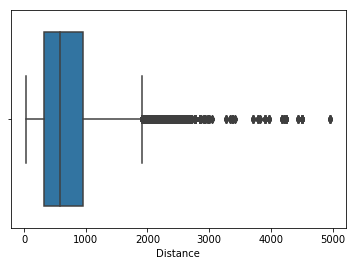

In [9]:
sns.boxplot(df_train['Distance']);

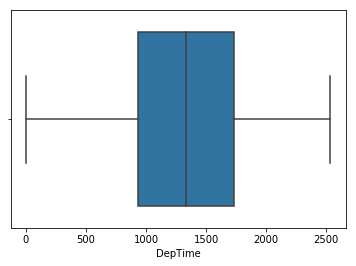

In [10]:
sns.boxplot(df_train['DepTime'])

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


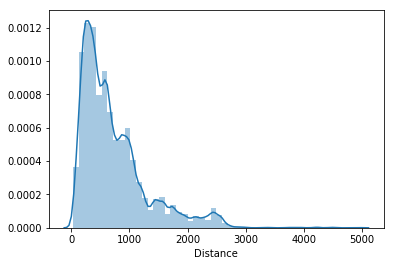

In [11]:
sns.distplot(df_train['Distance']);

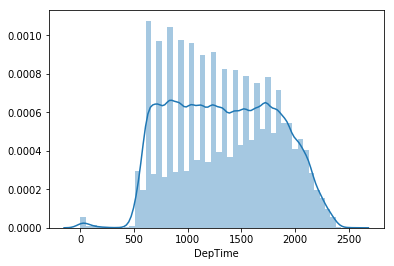

In [12]:
sns.distplot(df_train['DepTime']);

In [13]:
df_numb=df_train[['DepTime', 'Distance']]

In [14]:
df_numb.head()

,DepTime,Distance
0,1934,732
1,1548,834
2,1422,416
3,1015,872
4,1828,423


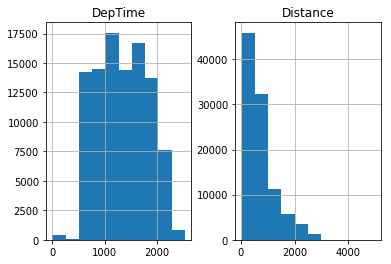

In [15]:
df_numb.hist();

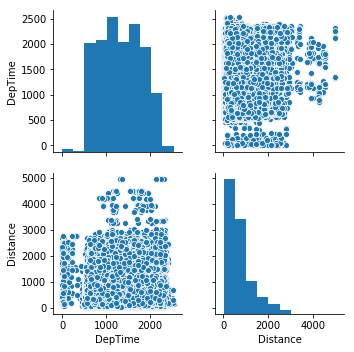

In [16]:
sns.pairplot(df_numb)

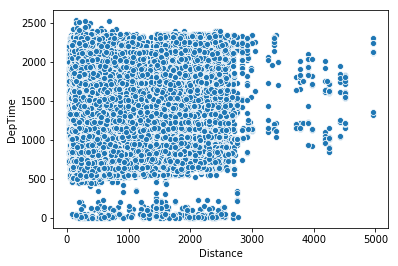

In [17]:
sns.scatterplot(x=df_numb['Distance'], y=df_numb['DepTime'])

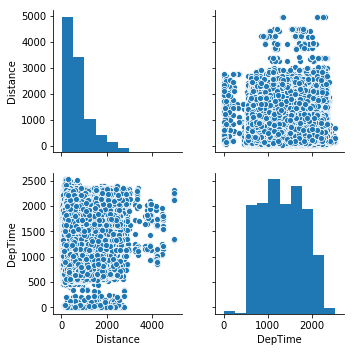

In [18]:
sns.pairplot(df_train, vars=['Distance', 'DepTime'])

## Раскрасим наш график распределения по признаку есть ли задержка 15 минут и  более или ее нет

In [19]:
colormaps=df_train['dep_delayed_15min'].map({'N' : 'blue', 'Y' : 'orange'})

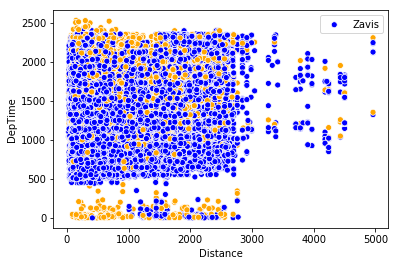

In [20]:
sns.scatterplot(df_train['Distance'], df_train['DepTime'], color=colormaps, label = 'Zavis')

# Категориальные признаки

In [21]:
df_train['Month'].value_counts()

c-8     8830
c-7     8706
c-3     8595
c-5     8543
c-6     8414
c-4     8408
c-10    8405
c-12    8265
c-11    8178
c-9     8163
c-1     8075
c-2     7418
Name: Month, dtype: int64

In [22]:
df_train['DayofMonth'].value_counts()

c-1     3399
c-20    3380
c-6     3377
c-22    3374
c-14    3366
c-17    3347
c-10    3342
c-27    3330
c-5     3321
c-28    3321
c-25    3314
c-23    3314
c-21    3312
c-19    3305
c-15    3297
c-2     3285
c-9     3283
c-7     3272
c-8     3258
c-4     3249
c-18    3246
c-26    3241
c-16    3240
c-13    3238
c-3     3228
c-12    3212
c-24    3210
c-11    3168
c-30    2976
c-29    2837
c-31    1958
Name: DayofMonth, dtype: int64

In [23]:
df_train.Month.unique()

array(['c-8', 'c-4', 'c-9', 'c-11', 'c-10', 'c-1', 'c-7', 'c-6', 'c-5',
       'c-3', 'c-12', 'c-2'], dtype=object)

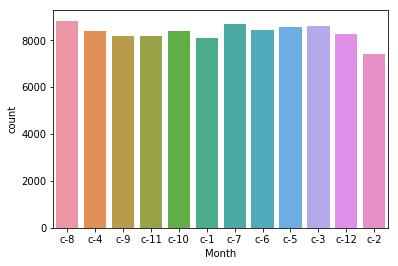

In [24]:
sns.countplot(df_train['Month']);

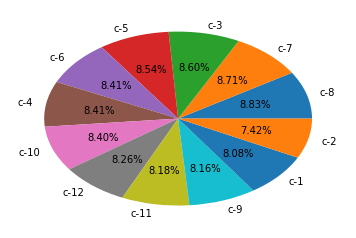

In [25]:
plt.pie(df_train.Month.value_counts(), labels=df_train.Month.value_counts().index, autopct='%.2f%%' );

# Взаимодействие количественного признака с категориальным

In [26]:
df_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [27]:
np.unique(df_train['Month'])

array(['c-1', 'c-10', 'c-11', 'c-12', 'c-2', 'c-3', 'c-4', 'c-5', 'c-6',
       'c-7', 'c-8', 'c-9'], dtype=object)

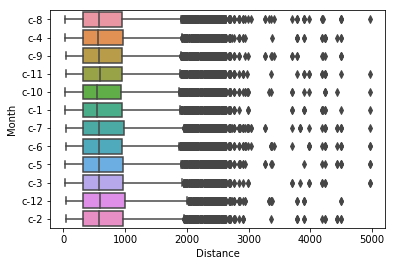

In [28]:
sns.boxplot(df_train['Distance'], df_train['Month']);

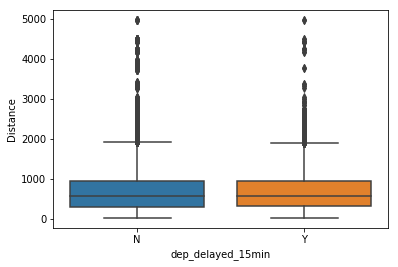

In [29]:
sns.boxplot(df_train['dep_delayed_15min'],df_train['Distance']);

# Категориальный с категориальным

In [30]:
pd.crosstab(df_train['dep_delayed_15min'], df_train['Month'])

Month,c-1,c-10,c-11,c-12,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9
dep_delayed_15min,,,,,,,,,,,,
N,6536,6904,6781,6271,6102,6919,7102,7230,6547,6633,7047,6884
Y,1539,1501,1397,1994,1316,1676,1306,1313,1867,2073,1783,1279


In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.style.use('ggplot')

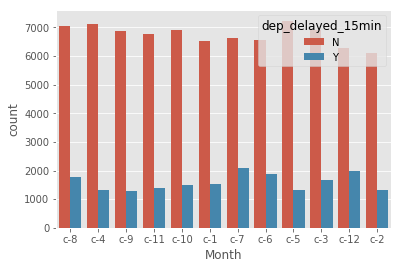

In [33]:
sns.countplot(x='Month', hue='dep_delayed_15min', data=df_train);

# Распределение числового признака по двум категориальным

In [34]:
pivot=df_train.pivot_table(values='Distance', index='dep_delayed_15min', columns='Month');

In [35]:
pivot

Month,c-1,c-10,c-11,c-12,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9
dep_delayed_15min,,,,,,,,,,,,
N,713.652846,726.650782,731.893379,744.695742,730.026549,721.189334,714.022810,731.010788,734.598442,739.280567,739.310203,736.907031
Y,733.583496,674.559627,705.382248,752.947844,730.881459,747.623508,742.486983,716.163747,730.985003,736.498794,718.445317,706.243159


In [36]:
df_train.groupby(['dep_delayed_15min', 'DepTime']).mean()

Distance
dep_delayed_15min DepTime             
N                 1        1618.750000
                  2        1718.750000
                  3        2360.000000
                  4         909.000000
                  5         634.333333
                  6        1526.666667
                  7        1664.333333
                  8        2167.500000
                  9        1702.333333
                  10       1673.000000
                  11       2276.000000
                  12       2139.500000
                  13       1355.000000
                  14       1431.500000
                  15       1885.500000
                  17       1979.000000
                  18       1222.000000
                  20       1779.250000
                  21       1464.000000
                  22       1705.000000
                  23       1898.000000
                  24       1499.333333
                  25       1976.000000
                  26       1426.000000
                  28       1536.000000
                  29       1404.500000
                  30       1539.000000
                  31       1909.000000
                  32       2381.000000
                  33       1334.000000
...                                ...
Y                 2346      797.500000
                  2347      621.500000
                  2348      722.400000
                  2349     1314.000000
                  2350     1210.857143
                  2351     1625.000000
                  2352     1049.000000
                  2353      297.000000
                  2354      662.500000
                  2355      924.142857
                  2356      988.000000
                  2358     1168.666667
                  2359      954.750000
                  2400     1231.142857
                  2401      554.000000
                  2412      153.000000
                  2415      191.000000
                  2417      793.000000
                  2418      106.000000
                  2435      219.500000
                  2440      552.000000
                  2447      341.000000
                  2450      300.000000
                  2459      341.000000
                  2500      377.000000
                  2505      143.000000
                  2514      191.000000
                  2522      686.000000
                  2530      300.000000
                  2534      151.000000

[2443 rows x 1 columns]

# Подбор метрики

In [37]:
from sklearn.metrics import accuracy_score
def metric(y_pred,y_test):
    return accuracy_score(y_test,y_pred)

In [38]:
y_test=[0,1,1,1,0,0]
y_pred=[1,0,1,1,0,1]
print("Метрика:", metric(y_test,y_pred))

Метрика: 0.5


In [39]:
accuracy_score(y_test,y_pred)

0.5

# Делаем предсказание

Итак, надо по времени вылета самолета, коду авиакомпании-перевозчика, месту вылета и прилета и расстоянию между аэропортами вылета и прилета предсказать задержку вылета более 15 минут. В качестве простейшего бенчмарка возьмем логистическую регрессию и два признака, которые проще всего взять: DepTime и Distance. У такой модели результат – 0.68202 на LB.

In [40]:
X_train, y_train=df_train[['Distance', 'DepTime']].values, df_train['dep_delayed_15min'].map({'Y' : 1, 'N' : 0}).values

In [41]:
X_test=df_test[['Distance', 'DepTime']].values

In [42]:
X_train_part, X_valid, y_train_part, y_valid=train_test_split(X_train, y_train, test_size=0.3, random_state=17)

# Обучим алгоритм логистической регрессии

In [43]:
logit = LogisticRegression(random_state=17)

In [44]:
logit.fit(X_train_part, y_train_part)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Сделаем прогноз для отложенной выборки

In [61]:
logit_valid_pred=logit.predict_proba(X_valid)

# Предполагая, что ваша цель (0,1), тогда классификатор PREDICT PROBA выведет матрицу вероятности размерности (N, 2)

# Первый индекс относится к вероятности того, что данные 
# относятся к классу 0, а второй относится к вероятности того, что данные принадлежат классу 1. 

In [66]:
np.sum(np.argmax(logit_valid_pred, axis=1))

0

In [58]:
logit.predict_proba(X_valid[0][np.newaxis,])

array([[0.90740414, 0.09259586]])

In [59]:
X_valid[0]

array([951, 702])

In [46]:
from sklearn.metrics import auc

In [48]:
roc_auc_score(y_valid, logit_valid_pred)

0.6789733731013721

In [50]:
import pickle

In [54]:
pickle.dump(logit, open('classifier.pkl', 'wb'), protocol=4)

In [ ]:
logit = pickle.load(open('classifier.pkl', 'rb'))

# А теперь сделаем прогноз для тестовой выборки

In [68]:
logit.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
logit_test_pred=logit.predict_proba(X_test)[:,1]

In [70]:
pd.Series(logit_test_pred, name='dep_delay_15min').to_csv('logit_2feat.csv', index_label = 'id', header=True)

# Обучим Xgboost

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
encoder=LabelEncoder()

In [77]:
df_train.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [76]:
df_train1=df_train

In [78]:
df_train1['Month']=encoder.fit_transform(df_train1['Month'])

In [85]:
df_train1.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,10,13,c-7,1934,AA,ATL,DFW,732,N
1,6,12,c-3,1548,US,PIT,MCO,834,N
2,11,11,c-5,1422,XE,RDU,CLE,416,N
3,2,17,c-6,1015,OO,DEN,MEM,872,N
4,1,28,c-6,1828,WN,MDW,OMA,423,Y


In [84]:
df_train1['DayofMonth']=encoder.fit_transform(df_train1['DayofMonth'])

In [86]:
y_train=df_train1['dep_delayed_15min']
df_train1.drop(columns='dep_delayed_15min', axis=1)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,10,13,c-7,1934,AA,ATL,DFW,732
1,6,12,c-3,1548,US,PIT,MCO,834
2,11,11,c-5,1422,XE,RDU,CLE,416
3,2,17,c-6,1015,OO,DEN,MEM,872
4,1,28,c-6,1828,WN,MDW,OMA,423
5,10,22,c-4,1918,NW,MEM,MCO,683
6,0,19,c-4,754,DL,PBI,LGA,1035
7,6,21,c-6,635,OH,MSP,CVG,596
8,9,20,c-5,735,AA,ONT,DFW,1189
9,8,12,c-2,2029,OO,DEN,PSC,853


In [88]:
df_train1=encoder.fit_transform(df_train1)

ValueError: bad input shape (100000, 9)